In [1]:
import pandas as pd
import numpy as np

file_path = "D:/cleaned_pos_dataset.csv"
df = pd.read_csv(file_path)
df

C:\Users\Asus\AppData\Local\Temp\ipykernel_17504\2918875776.py:5: DtypeWarning: Columns (27,28,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Sentiment,pos_1,pos_2,pos_3,pos_4,pos_5,pos_6,pos_7,pos_8,pos_9,...,pos_31,pos_32,pos_33,pos_34,pos_35,pos_36,pos_37,pos_38,pos_39,pos_40
0,negative,AUX,ADJ,PRON,AUX,VERB,PRON,NOUN,ADP,VERB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,negative,AUX,VERB,ADP,NOUN,NOUN,NOUN,ADV,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,negative,PRON,VERB,ADJ,NOUN,ADP,NOUN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,negative,VERB,VERB,NOUN,VERB,ADP,ADP,NOUN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,negative,PRON,ADJ,NOUN,VERB,ADJ,ADP,PRON,ADP,NOUN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434075,positive,NOUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2434076,positive,VERB,ADV,ADJ,VERB,ADJ,ADJ,NOUN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2434077,positive,AUX,PRON,ADJ,ADP,PRON,ADJ,NOUN,VERB,PRON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2434078,positive,ADJ,NOUN,ADP,PRON,NOUN,ADP,NOUN,NOUN,PROPN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
pos_weights = {
    'ADJ': 5, 'ADV': 4, 'NOUN': 2, 'VERB': 3, 'PRON': 1,
    'PROPN': 1, 'ADP': 1, 'CCONJ': 1, 'INTJ': 1, 'SCONJ': 1,
    'AUX': 1
}

def assign_pos_weights(row):
    weights = []
    for pos in row:
        if pd.isna(pos):  # Handle NaN values
            weights.append(0)
        else:
            weights.append(pos_weights.get(pos, 1))  # Default weight 1
    return weights

# Apply POS weighting to all POS columns
pos_columns = [col for col in df.columns if 'pos' in col]
df['pos_weighted'] = df[pos_columns].apply(assign_pos_weights, axis=1)

# Convert list of weights into feature vectors
df['feature_vector'] = df['pos_weighted'].apply(lambda x: np.array(x))

# Normalize feature vectors
# df['feature_vector'] = df['feature_vector'].apply(lambda x: x / (np.linalg.norm(x) + 1e-6))

# Handle NaN or infinite values
df['feature_vector'] = df['feature_vector'].apply(lambda x: np.nan_to_num(x, nan=0.0, posinf=10.0, neginf=-10.0))

# Drop intermediate column
df.drop(columns=['pos_weighted'], inplace=True)
df


,Sentiment,pos_1,pos_2,pos_3,pos_4,pos_5,pos_6,pos_7,pos_8,pos_9,...,pos_32,pos_33,pos_34,pos_35,pos_36,pos_37,pos_38,pos_39,pos_40,feature_vector
0,negative,AUX,ADJ,PRON,AUX,VERB,PRON,NOUN,ADP,VERB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[1, 5, 1, 1, 3, 1, 2, 1, 3, 1, 0, 0, 0, 0, 0, ..."
1,negative,AUX,VERB,ADP,NOUN,NOUN,NOUN,ADV,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[1, 3, 1, 2, 2, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,negative,PRON,VERB,ADJ,NOUN,ADP,NOUN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[1, 3, 5, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,negative,VERB,VERB,NOUN,VERB,ADP,ADP,NOUN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[3, 3, 2, 3, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,negative,PRON,ADJ,NOUN,VERB,ADJ,ADP,PRON,ADP,NOUN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[1, 5, 2, 3, 5, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434075,positive,NOUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2434076,positive,VERB,ADV,ADJ,VERB,ADJ,ADJ,NOUN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[3, 4, 5, 3, 5, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2434077,positive,AUX,PRON,ADJ,ADP,PRON,ADJ,NOUN,VERB,PRON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[1, 1, 5, 1, 1, 5, 2, 3, 1, 1, 2, 0, 0, 0, 0, ..."
2434078,positive,ADJ,NOUN,ADP,PRON,NOUN,ADP,NOUN,NOUN,PROPN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[5, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, ..."


In [4]:
from nltk.classify import MaxentClassifier
from nltk.classify.util import accuracy

In [5]:
def format_features(row, n):
    return {f'pos_{i}': val for i, val in enumerate(row[:n])}  # Use first n POS tags

def train_mem(n):
    df['features'] = df['feature_vector'].apply(lambda row: format_features(row, n))
    
    # Adjust labeling to ensure both positive and negative labels exist
    df['mean_weight'] = df['feature_vector'].apply(np.mean)
    threshold = df['mean_weight'].median()
    df['label'] = df['mean_weight'].apply(lambda x: 'positive' if x > threshold else 'negative')
    
    # Convert to list of tuples for training
    data = list(zip(df['features'], df['label']))
    
    # Split data into training and test sets
    train_data = data[:int(0.8 * len(data))]
    test_data = data[int(0.8 * len(data)) :]
    
    # Train Maximum Entropy Model with GIS optimizer to avoid instability
    classifier = MaxentClassifier.train(train_data, algorithm='GIS', max_iter=5)
    
    # Evaluate the classifier
    return accuracy(classifier, test_data)

# Train MEM with different numbers of POS tags
n_values = range(1, 41)
accuracies = []
for n in n_values:
    acc = train_mem(n)
    accuracies.append(acc)
    print(f'Accuracy for {n} POS tags: {acc:.4f}')

  ==> Training (5 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.497
             2          -0.68841        0.532
             3          -0.68607        0.532
             4          -0.68492        0.532
         Final          -0.68435        0.532
Accuracy for 1 POS tags: 0.5302
  ==> Training (5 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.497
             2          -0.67798        0.578
             3          -0.66748        0.578
             4          -0.65988        0.578
         Final          -0.65415        0.578
Accuracy for 2 POS tags: 0.5732
  ==> Training (5 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.497
             2          -0.66006        0.638
             3 

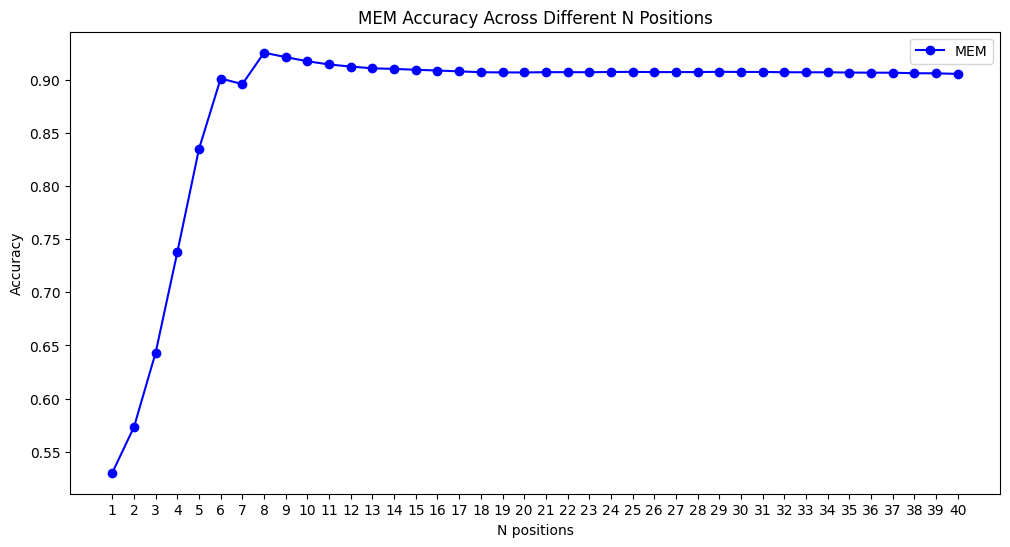

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(n_values, accuracies, marker='o', linestyle='-', color='b', label='MEM')
plt.xlabel('N positions')
plt.ylabel('Accuracy')
plt.title('MEM Accuracy Across Different N Positions')
plt.legend()
plt.xticks(range(1, 41))
plt.grid(False)
plt.show()